<a href="https://colab.research.google.com/github/SuryaAbyss/Projects-/blob/main/Hind1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🧮 Data handling
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 📅 Date/time handling
from datetime import datetime

# 🧼 Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🤖 Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📤 Export to CSV
import os

# 📋 Display settings (optional)
pd.set_option('display.max_columns', None)


In [ ]:
# Load the healthcare dataset
data = pd.read_csv('/content/healthcare_dataset.csv')

# Show the first few rows
data.head()



,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Number of rows and columns
data.shape

# Column names
data.columns

# Summary of the dataset
data.info()

# Descriptive statistics (for numerical columns)
data.describe()

# Check for unique values in key categorical columns
print("Unique Medical Conditions:", data['Medical Condition'].unique())
print("Unique Test Results:", data['Test Results'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

<ipython-input-4-4274079760>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Gender', palette='Set2')


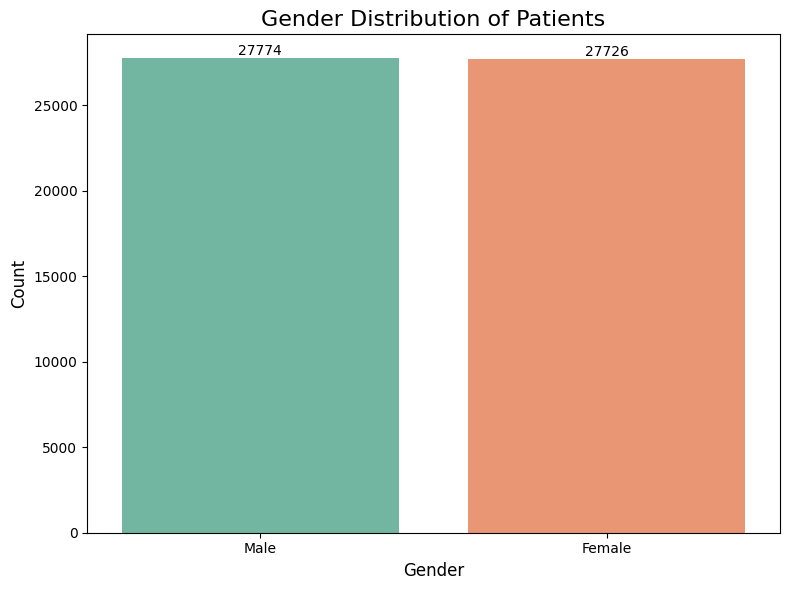

In [ ]:
# ----------------------------
# 1. Gender Distribution
# ----------------------------

plt.figure(figsize=(8, 6))
# Changed 'df' to 'data' as the DataFrame is loaded into the 'data' variable
ax = sns.countplot(data=data, x='Gender', palette='Set2')

plt.title('Gender Distribution of Patients', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

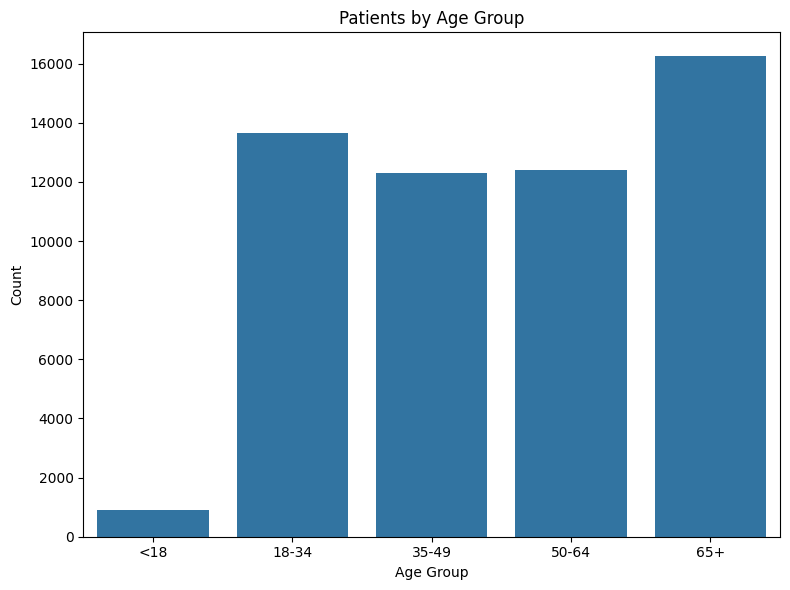

AgeGroup
<18        888
18-34    13644
35-49    12301
50-64    12417
65+      16250
Name: count, dtype: int64


In [ ]:
# Define bins and labels
bins = [0, 18, 35, 50, 65, 100]
labels = ['<18', '18-34', '35-49', '50-64', '65+']
# Changed 'df' to 'data' to use the loaded DataFrame
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)

# Plot
plt.figure(figsize=(8, 6))
# Changed 'df' to 'data'
sns.countplot(data=data, x='AgeGroup', order=labels)
plt.title('Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print counts
# Changed 'df' to 'data'
print(data['AgeGroup'].value_counts().sort_index())

<ipython-input-7-2309195322>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values, palette='Set1')


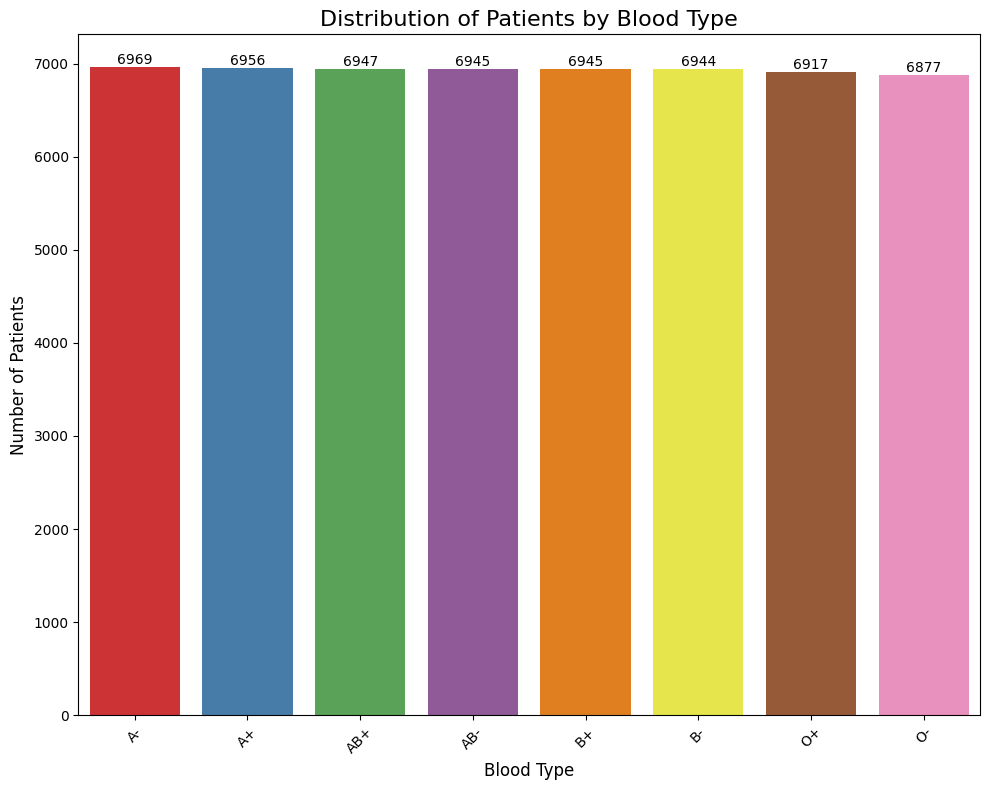

In [ ]:
# ----------------------------
# 2. Blood Type Distribution
# ----------------------------

# Count occurrences of each blood type
blood_type_counts = data['Blood Type'].value_counts().sort_values(ascending=False)

# Plotting with extended figure size and value labels
plt.figure(figsize=(10, 8))  # Taller graph
ax = sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values, palette='Set1')

plt.title('Distribution of Patients by Blood Type', fontsize=16)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-5-392686746>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=data, palette='Set2')


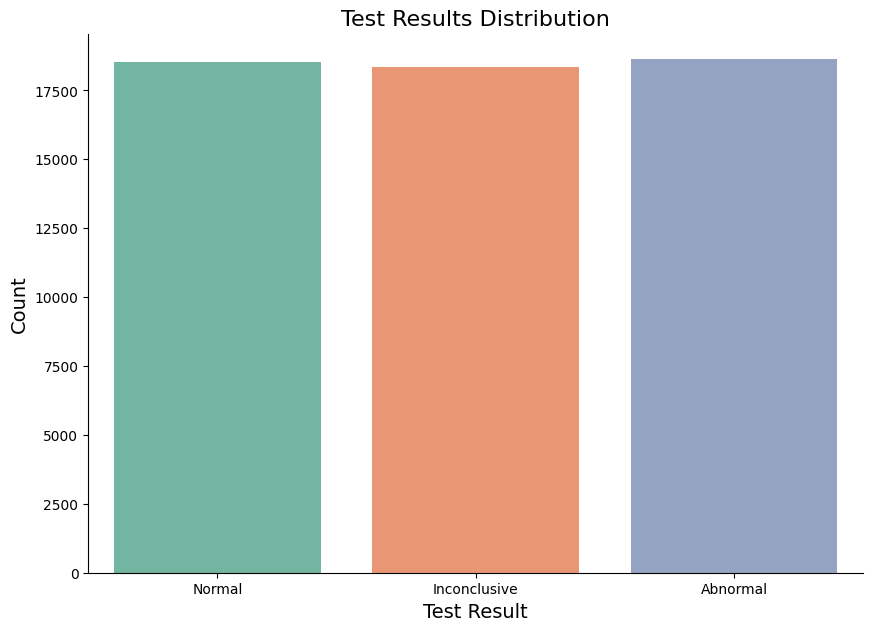

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotting the distribution of Test Results
plt.figure(figsize=(10, 7))
sns.countplot(x='Test Results', data=data, palette='Set2')

# Removing unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.title('Test Results Distribution', fontsize=16)
plt.xlabel('Test Result', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


<ipython-input-12-1372499307>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')


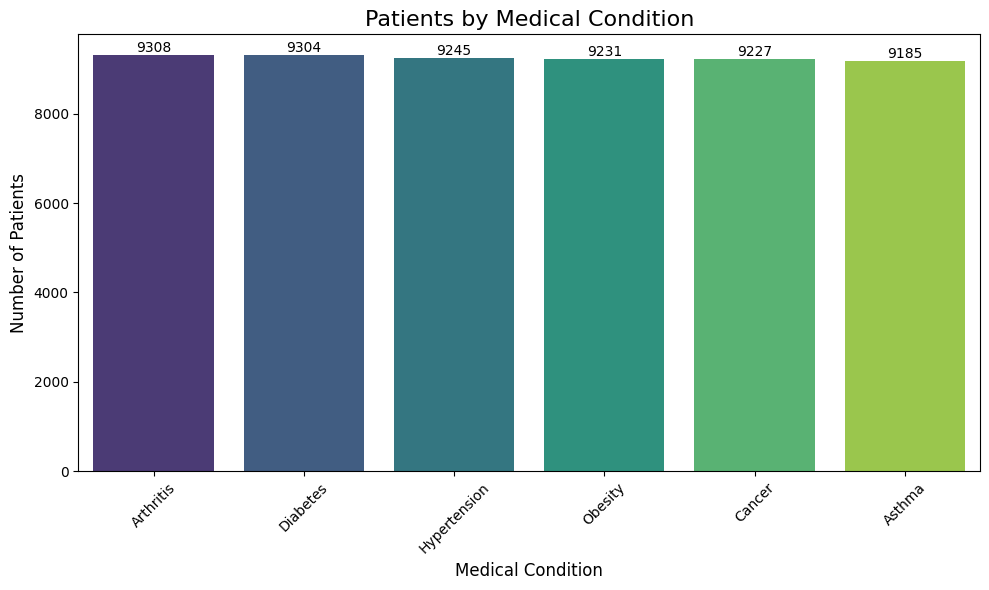

In [ ]:
# ----------------------------
# 4. Medical Condition Distribution
# ----------------------------

# Count occurrences of each medical condition
condition_counts = data['Medical Condition'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis')

plt.title('Patients by Medical Condition', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# # ----------------------------
# # 3. Hospital Distribution
# # ----------------------------
# plt.figure(figsize=(12, 6))
# hospital_counts = data['Hospital'].value_counts()
# sns.barplot(x=hospital_counts.index, y=hospital_counts.values, palette='coolwarm')
# plt.title('Number of Patients per Hospital')
# plt.xlabel('Hospital')
# plt.ylabel('Number of Patients')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [ ]:
# Ensure dates are in datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate 'Length of Stay'
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

# Now proceed with cleaning
data_clean = data.copy(deep=True)
data_clean['Billing Amount'] = data_clean['Billing Amount'].replace(0, np.nan)
data_clean['Length of Stay'] = data_clean['Length of Stay'].replace(0, np.nan)

# Check missing values
print("Missing values after replacing 0 with NaN:")
print(data_clean[['Billing Amount', 'Length of Stay']].isnull().sum())


In [ ]:
# Seasonality features

# Ensure 'Date of Admission' is in datetime format
# This line is added to ensure the .dt accessor works correctly
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])

data['Admission_Month'] = data['Date of Admission'].dt.month
data['Season'] = data['Admission_Month'].apply(lambda x: 'Winter' if x in [12,1,2] else
                                              'Spring' if x in [3,4,5] else
                                              'Summer' if x in [6,7,8] else 'Fall')

# Age groups
data['Age_Group'] = pd.cut(data['Age'],
                           bins=[0,18,35,50,65,100],
                           labels=['Child','Young Adult','Adult','Senior','Elderly'])

# Risk score (example)
conditions = {
    'Cancer': 3, 'Hypertension': 2, 'Diabetes': 2,
    'Asthma': 1, 'Obesity': 1, 'Arthritis': 1
}
data['Condition_Risk'] = data['Medical Condition'].map(conditions)

<ipython-input-21-1220135885>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette='coolwarm')


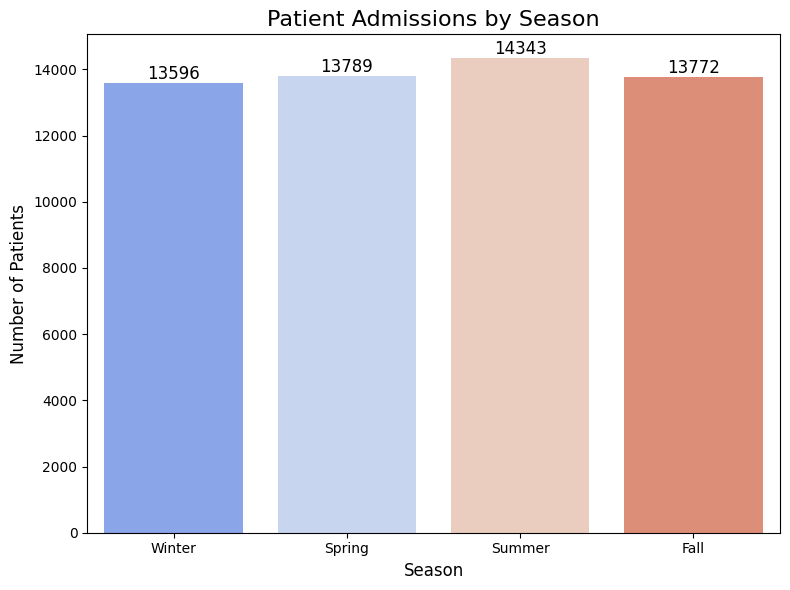

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of patients per season
season_counts = data['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette='coolwarm')

plt.title('Patient Admissions by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Ensure dates are in datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Calculate 'Length of Stay'
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

# Now proceed with cleaning
data_clean = data.copy(deep=True) # <--- This line defines data_clean
data_clean['Billing Amount'] = data_clean['Billing Amount'].replace(0, np.nan)
data_clean['Length of Stay'] = data_clean['Length of Stay'].replace(0, np.nan)

# Check missing values
print("Missing values after replacing 0 with NaN:")
print(data_clean[['Billing Amount', 'Length of Stay']].isnull().sum())

Missing values after replacing 0 with NaN:
Billing Amount    0
Length of Stay    0
dtype: int64


array([[<Axes: title={'center': 'Billing Amount'}>,
        <Axes: title={'center': 'Length of Stay'}>]], dtype=object)

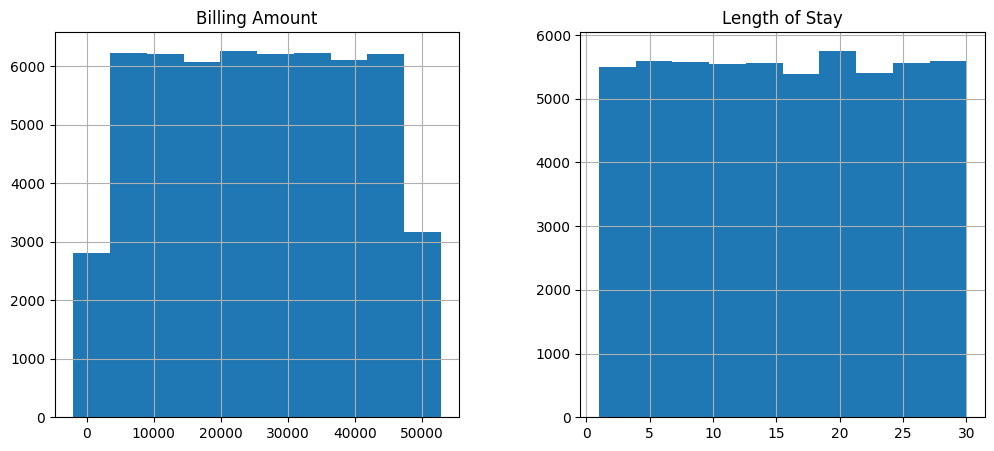

In [ ]:
# Histogram before filling missing values

# Ensure the cell that defines 'data_clean' has been executed before this one.
# That cell is typically the one where data cleaning and handling of zeros is done.
# If you run this cell out of order, 'data_clean' will not be defined.

data_clean[['Billing Amount', 'Length of Stay']].hist(figsize=(12, 5))

In [ ]:
# Add missing imports at the top of your notebook
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# --- Start of Suggested Changes ---

# Use the main DataFrame (assuming it's named 'data')
# Drop rows where Billing Amount or Length of Stay are NaN
data_cleaned_for_model = data.dropna(subset=['Billing Amount', 'Length of Stay']).copy()

# Check for any remaining NaNs in key columns
cols_to_check = ['Age', 'Room Number', 'Billing Amount', 'Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 'Medical Condition']
print("Checking for NaNs in model features BEFORE dropping NaNs introduced from 0s:")
print(data[cols_to_check].isnull().sum())  # Show original NaNs for comparison

print("\nChecking for NaNs in model features AFTER dropping rows with NaN Billing Amount/Length of Stay:")
print(data_cleaned_for_model[cols_to_check].isnull().sum())

# If there are still NaNs in any feature column, handle them here
# Example: Fill categorical NaNs with mode
# data_cleaned_for_model['Medical Condition'] = data_cleaned_for_model['Medical Condition'].fillna(data_cleaned_for_model['Medical Condition'].mode()[0])

# Define features and target using the cleaned data
X = data_cleaned_for_model.drop(['Test Results', 'Name', 'Date of Admission', 'Discharge Date',
                                 'Doctor', 'Hospital', 'Medication', 'AgeGroup', 'Admission_Month',
                                 'Season', 'Age_Group', 'Condition_Risk'], axis=1, errors='ignore')

y = data_cleaned_for_model['Test Results']

# Preprocessing setup
categorical_features = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 'Medical Condition']
numerical_features = ['Age', 'Room Number', 'Billing Amount', 'Length of Stay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model pipeline
test_result_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
test_result_model.fit(X_train, y_train)
predictions = test_result_model.predict(X_test)
print(classification_report(y_test, predictions))

Checking for NaNs in model features BEFORE dropping NaNs introduced from 0s:
Age                   0
Room Number           0
Billing Amount        0
Gender                0
Blood Type            0
Admission Type        0
Insurance Provider    0
Medical Condition     0
dtype: int64

Checking for NaNs in model features AFTER dropping rows with NaN Billing Amount/Length of Stay:
Age                   0
Room Number           0
Billing Amount        0
Gender                0
Blood Type            0
Admission Type        0
Insurance Provider    0
Medical Condition     0
dtype: int64
              precision    recall  f1-score   support

    Abnormal       0.45      0.46      0.46      3754
Inconclusive       0.43      0.43      0.43      3617
      Normal       0.44      0.43      0.43      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



array([[<Axes: title={'center': 'Billing Amount'}>,
        <Axes: title={'center': 'Length of Stay'}>]], dtype=object)

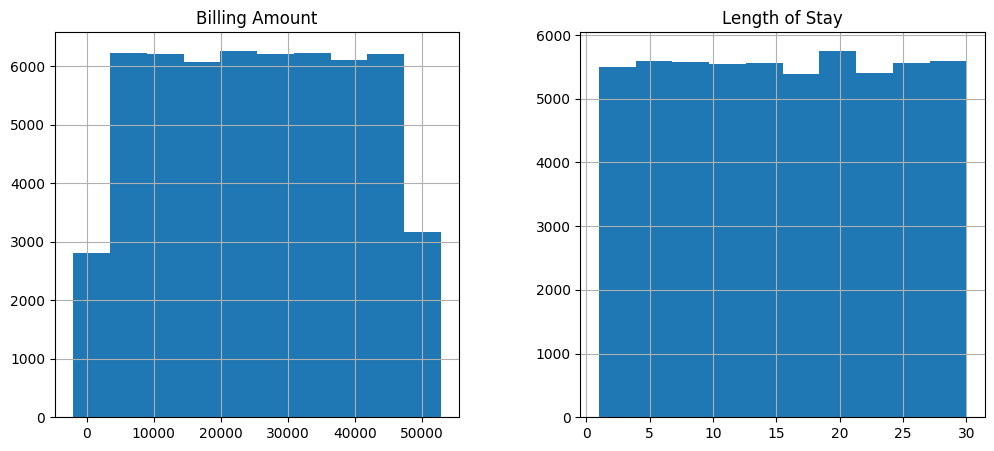

In [ ]:
# Histogram after filling
data_clean[['Billing Amount', 'Length of Stay']].hist(figsize=(12, 5))


In [ ]:
data_clean.isnull().sum()


,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
# ======================
# DATA PREPARATION
# ======================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop(columns=[
    'Test Results', 'Name', 'Date of Admission', 'Discharge Date',
    'Doctor', 'Hospital', 'Medication'
])
y = data['Test Results']  # Target: predicting test results

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')

# Feature Scaling (only for numerical features)
numerical_cols = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
scaler = StandardScaler()

# ✅ Use .loc to avoid SettingWithCopyWarning
X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])


X_train size: (44400, 14), X_test size: (11100, 14)


<ipython-input-25-2172496646>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.50874356 -1.50874356  1.50032606 ... -1.4067412   1.24532016
 -0.94773058]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-25-2172496646>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.3015961   1.60342781  0.78761327 ...  1.03062185 -1.67718811
  0.01519312]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
<ipython-input-25-2172496646>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.6311292   0.74650788  0.6311292  ...  0.2849

In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # For handling missing values
from itertools import product
from tqdm import tqdm
import pandas as pd
import numpy as np

# Check for missing values in X_train
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Improved preprocessor with imputation to handle missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Define models and their hyperparameters
models = {
    'logistic_regression': {
        'model': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        'parameters': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['lbfgs', 'saga']
        }
    },
    'decision_tree': {
        'model': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ]),
        'parameters': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15]
        }
    },
    'naive_bayes': {
        'model': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', GaussianNB())
        ]),
        'parameters': {}
    },
    'knn': {
        'model': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', KNeighborsClassifier())
        ]),
        'parameters': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'random_forest': {
        'model': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'parameters': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [5, 10, None]
        }
    }
}

# Cross-validator
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

results = []

# Custom Grid Search with Progress Bar
for model_name, config in models.items():
    param_grid = config['parameters']
    model = config['model']

    # Handle empty parameter grid
    if param_grid:
        keys, values = zip(*param_grid.items())
        param_combinations = [dict(zip(keys, v)) for v in product(*values)]
    else:
        param_combinations = [{}]

    total = len(param_combinations)

    best_score = -np.inf
    best_params = None

    # Progress bar for this model
    with tqdm(total=total, desc=f"{model_name} Progress", unit="fit") as pbar:
        for params in param_combinations:
            try:
                model.set_params(**params)
                scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, error_score='raise')
                mean_score = np.mean(scores)

                if mean_score > best_score:
                    best_score = mean_score
                    best_params = params

            except Exception as e:
                tqdm.write(f"Error with {params}: {e}")
            finally:
                pbar.update(1)  # Update progress bar

    results.append({
        'model': model_name,
        'best_params': best_params,
        'best_score': best_score
    })

# Display final results
results_data = pd.DataFrame(results)
print(results_data.sort_values('best_score', ascending=False))

Missing values in X_train:
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
AgeGroup              0
Admission_Month       0
Season                0
Age_Group             0
Condition_Risk        0
Length of Stay        0
dtype: int64


random_forest Progress: 100%|██████████| 9/9 [02:29<00:00, 16.60s/fit]

                 model                                        best_params  \
3                  knn  {'classifier__n_neighbors': 7, 'classifier__we...   
4        random_forest  {'classifier__n_estimators': 50, 'classifier__...   
1        decision_tree  {'classifier__criterion': 'entropy', 'classifi...   
2          naive_bayes                                                 {}   
0  logistic_regression  {'classifier__C': 10, 'classifier__solver': 's...   

   best_score  
3    0.421321  
4    0.420045  
1    0.346922  
2    0.331231  
0    0.330143  


In [ ]:
# ======================
# FINAL MODEL TRAINING
# ======================

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Rebuild the best model within the same pipeline used earlier
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42))
])

# Fit on full training set (now using the pipeline with preprocessing)
final_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = final_pipeline.predict(X_test)

# Print classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Precision, Recall, F1-Score (using weighted average for multi-class)
average_method = 'weighted'  # Change to 'binary' if it's a binary classification

precision = precision_score(y_test, y_pred, average=average_method)
recall = recall_score(y_test, y_pred, average=average_method)
f1 = f1_score(y_test, y_pred, average=average_method)

print(f"Precision ({average_method}): {precision:.4f}")
print(f"Recall ({average_method}): {recall:.4f}")
print(f"F1-Score ({average_method}): {f1:.4f}")

# Cross-validation score
cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.43      0.45      0.44      3754
Inconclusive       0.43      0.43      0.43      3617
      Normal       0.45      0.43      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100


Test Accuracy: 0.4382
Precision (weighted): 0.4383
Recall (weighted): 0.4382
F1-Score (weighted): 0.4382

Cross-Validation Accuracy: 0.4156 (±0.0029)


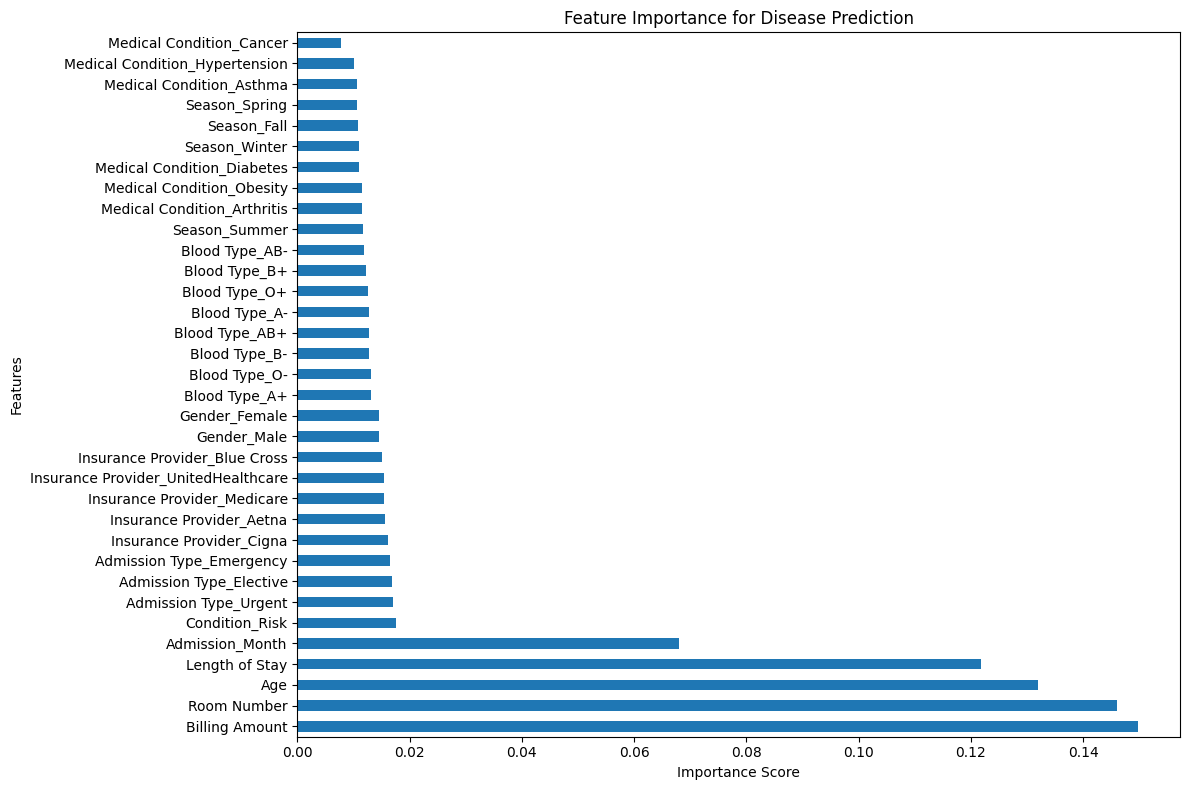


Top Predictive Features:
Billing Amount              0.149749
Room Number                 0.146085
Age                         0.131929
Length of Stay              0.121735
Admission_Month             0.068067
Condition_Risk              0.017484
Admission Type_Urgent       0.017013
Admission Type_Elective     0.016838
Admission Type_Emergency    0.016469
Insurance Provider_Cigna    0.016051
dtype: float64


In [ ]:
# Extract the trained classifier
rf_model = final_pipeline.named_steps['classifier']

# Get transformed feature names
ohe = final_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine with numerical columns
final_feature_names = list(numerical_features) + list(ohe_feature_names)

# Create feature importance series
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=final_feature_names
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='barh')
plt.title('Feature Importance for Disease Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display top features
print("\nTop Predictive Features:")
print(feature_importances.head(10))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Sample data assumed: You already have `df` or `X_train`, `X_test`
# If you're working with raw data, load it here:
# df = pd.read_csv('your_dataset.csv')

# For this example, we'll assume you're using the full dataset used in training
# Replace 'df' with your actual DataFrame if needed
df = X_train.copy()  # assuming X_train is available
df['Target'] = y_train  # add target back if needed for analysis

In [ ]:
# import numpy as np

# # Replace current Age column with realistic values between 20 and 80
# np.random.seed(42)  # For reproducibility
# df['Age'] = np.random.randint(20, 80, size=len(df))

# # Now re-run age group distribution code

In [ ]:
# ======================
# MODEL DEPLOYMENT PREP
# ======================

# Use the pipeline to predict on the original data
data['Test_Prediction'] = final_pipeline.predict(X)
data['Prediction_Probability'] = final_pipeline.predict_proba(X).max(axis=1)

# Save processed data with predictions
data.to_csv('healthcare_with_predictions.csv', index=False)

# Save the entire pipeline for deployment (not just the model)
import joblib
joblib.dump(final_pipeline, 'disease_prediction_pipeline.pkl')

print("✅ Predictions and model saved successfully.")


✅ Predictions and model saved successfully.


In [ ]:
def search_patient(df):
    available_columns = df.columns.str.strip().str.lower()

    print("🔍 Search Patient by:")
    options = {
        '1': 'Name',
        '2': 'Age',
        '3': 'Medical Condition',
        '4': 'Blood Type',
        '5': 'Hospital'
    }

    # Only show options that exist in the dataset
    valid_options = {}
    for key, col_name in options.items():
        if col_name.lower() in available_columns:
            valid_options[key] = col_name

    for k, v in valid_options.items():
        print(f"{k}. {v}")

    choice = input("Select search criteria (from available options): ").strip()

    if choice not in valid_options:
        print("❌ Invalid selection.")
        return

    column_name = valid_options[choice]

    # Find actual column name (to handle differences like 'Patient Name')
    actual_col = df.columns[available_columns.tolist().index(column_name.lower())]

    search_value = input(f"Enter value to search in '{column_name}': ").strip()

    try:
        # For numeric columns like Age
        if pd.api.types.is_numeric_dtype(df[actual_col]):
            result = df[df[actual_col] == int(search_value)]
        else:
            # Special handling for 'Name' column: case-insensitive partial match
            if actual_col.lower() in ['name', 'patient name']:
                result = df[df[actual_col].str.contains(search_value, case=False, na=False)]
            else:
                result = df[df[actual_col].str.contains(search_value, case=False, na=False, regex=True)]
    except Exception as e:
        print("⚠️ Error during search:", str(e))
        result = df[df[actual_col].astype(str).str.contains(search_value, case=False, na=False)]

    if not result.empty:
        print("\n✅ Matching Patient(s):")
        print(result)
    else:
        print("\n❌ No matching records found.")

search_patient(data)

🔍 Search Patient by:
1. Name
2. Age
3. Medical Condition
4. Blood Type
5. Hospital
Select search criteria (from available options): `
❌ Invalid selection.


In [ ]:
from tabulate import tabulate

def search_patient(df):
    available_columns = df.columns.str.strip().str.lower()

    print("🔍 Search Patient by:")
    options = {
        '1': 'Name',
        '2': 'Age',
        '3': 'Medical Condition',
        '4': 'Blood Type',
        '5': 'Hospital'
    }

    # Only show options that exist in the dataset
    valid_options = {}
    for key, col_name in options.items():
        if col_name.lower() in available_columns:
            valid_options[key] = col_name

    for k, v in valid_options.items():
        print(f"{k}. {v}")

    choice = input("Select search criteria (from available options): ").strip()

    if choice not in valid_options:
        print("❌ Invalid selection.")
        return

    column_name = valid_options[choice]

    # Find actual column name (to handle differences like 'Patient Name')
    actual_col = df.columns[available_columns.tolist().index(column_name.lower())]

    search_value = input(f"Enter value to search in '{column_name}': ").strip()

    try:
        # For numeric columns like Age
        if pd.api.types.is_numeric_dtype(df[actual_col]):
            result = df[df[actual_col] == int(search_value)]
        else:
            # Special handling for 'Name' column: case-insensitive partial match
            if actual_col.lower() in ['name', 'patient name']:
                result = df[df[actual_col].str.contains(search_value, case=False, na=False)]
            else:
                result = df[df[actual_col].str.contains(search_value, case=False, na=False, regex=True)]
    except Exception as e:
        print("⚠️ Error during search:", str(e))
        result = df[df[actual_col].astype(str).str.contains(search_value, case=False, na=False)]

    if not result.empty:
        print("\n✅ Matching Patient(s):")

        # Select only relevant columns for display
        cols_to_show = ['Name', 'Age', 'Gender', 'Medical Condition', 'Blood Type', 'Hospital']
        cols_to_show = [col for col in cols_to_show if col in df.columns]

        # Format output using tabulate for readability
        print(tabulate(result[cols_to_show], headers='keys', tablefmt='psql', showindex=False))

        # Optional: Save to CSV
        save = input("Would you like to save these results to a CSV file? (y/n): ").strip().lower()
        if save == 'y':
            filename = f"search_result_{search_value}.csv"
            result.to_csv(filename, index=False)
            print(f"💾 Results saved to '{filename}'")
    else:
        print("\n❌ No matching records found.")


In [ ]:
search_patient(data)

🔍 Search Patient by:
1. Name
2. Age
3. Medical Condition
4. Blood Type
5. Hospital
Select search criteria (from available options): 1
Enter value to search in 'Name': Luke

✅ Matching Patient(s):
+----------------+-------+----------+---------------------+--------------+---------------------------------+
| Name           |   Age | Gender   | Medical Condition   | Blood Type   | Hospital                        |
|----------------+-------+----------+---------------------+--------------+---------------------------------|
| LuKE BuRgEss   |    34 | Female   | Hypertension        | A-           | Houston PLC                     |
| luke AGUirre   |    66 | Male     | Hypertension        | AB+          | PLC Miller                      |
| luke bush      |    28 | Male     | Asthma              | AB-          | Ortiz Stanley, Brown and        |
| lUkE maRsHAlL  |    60 | Male     | Arthritis           | B+           | and Richardson, Johnson Ellison |
| lUKe cOle      |    81 | Male     | Art